# REASON

By this dataset of animals, we will figure out if we can predict animals by images.

# IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

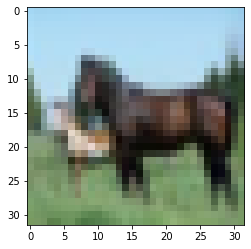

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train[12].max()

251

We are going to transform the number into smallers, keeping the difference of numbers but now the machine will work easier with them.

In [8]:
x_train = x_train/255

In [9]:
x_test =  x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

# BEFORE TRAINING THE MODEL

Before to start we need to change the values of our dataset, we can do this by using categorical values.

The to_categorical function takes a vector of class labels as input, and returns a matrix where each row corresponds to a sample, and each column corresponds to a class. The matrix is filled with binary values, where a value of 1 indicates that the corresponding sample belongs to the corresponding class, and a value of 0 indicates that it does not.

from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
y_test[0]

array([3], dtype=uint8)

# CREATING THE MODEL

If you would like to create a model to predict images, you will need more features and patterns because it is more difficult.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

Let's add an Early Stopping to break when the model is on its higher performance.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

# TRAINING THE MODEL

In [20]:
model.fit(x_train, y_cat_train, epochs = 15, validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 119s 73ms/step - loss: 1.4936 - accuracy: 0.4597 - val_loss: 1.2944 - val_accuracy: 0.5450
Epoch 2/15
1563/1563 [==============================] - 106s 68ms/step - loss: 1.1595 - accuracy: 0.5913 - val_loss: 1.0850 - val_accuracy: 0.6208
Epoch 3/15
1563/1563 [==============================] - 94s 60ms/step - loss: 1.0052 - accuracy: 0.6509 - val_loss: 1.0842 - val_accuracy: 0.6244
Epoch 4/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9035 - accuracy: 0.6854 - val_loss: 0.9959 - val_accuracy: 0.6589
Epoch 5/15
1563/1563 [==============================] - 134s 86ms/step - loss: 0.8170 - accuracy: 0.7153 - val_loss: 0.9457 - val_accuracy: 0.6742
Epoch 6/15
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7390 - accuracy: 0.7442 - val_loss: 0.9609 - val_accuracy: 0.6747
Epoch 7/15
1563/1563 [==============================] - 121s 78ms/step - loss: 0.6704 - accuracy: 0.7667 - val_loss: 0.94

Getting the results and plot them to see how efficient it is.

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

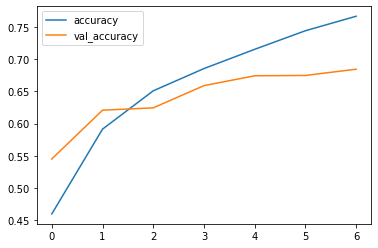

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

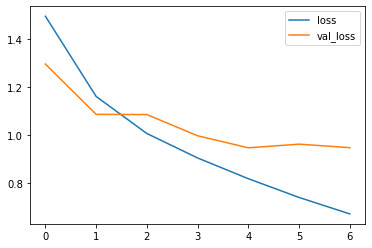

In [23]:
metrics[["loss", "val_loss"]].plot()

In [24]:
model.evaluate(x_test, y_cat_test, verbose = 0)

[0.946321964263916, 0.6844000220298767]

# FINALS RESULTS

We got an accuracy of 68%. it looks a bad number but for images detection is a decent number. We can improve it but it will take more machine power.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
pre =  model.predict(x_test).argmax(axis=-1)

313/313 [==============================] - 8s 20ms/step


In [27]:
print(classification_report(y_test, pre))
print("*********************")
print(confusion_matrix(y_test, pre ))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.79      0.82      0.80      1000
           2       0.63      0.53      0.57      1000
           3       0.52      0.46      0.49      1000
           4       0.64      0.59      0.62      1000
           5       0.55      0.65      0.60      1000
           6       0.74      0.77      0.75      1000
           7       0.73      0.75      0.74      1000
           8       0.82      0.73      0.77      1000
           9       0.73      0.78      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

*********************
[[772  25  42  21  19   9   6  19  47  40]
 [ 32 819   4   7   2   3  11   9  20  93]
 [ 80  12 527  53  71 104  75  36  16  26]
 [ 22  12  58 455  83 212  59  52  21  26]
 [ 27   6  81  74 594  77  49  68  15   9]
 [ 1

<AxesSubplot:>

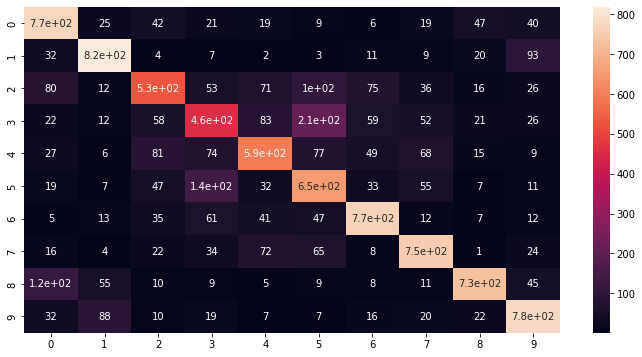

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, pre ), annot = True)

# TESTING

We pick the fifteenth image, which is a boat.

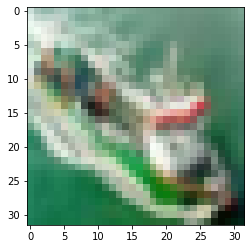

In [29]:
my_image = x_test[15]
plt.imshow(my_image)

In [30]:
y_test[15] #8 is boat

array([8], dtype=uint8)

In [36]:
x_test[15].shape

(32, 32, 3)

And according to the true value and the prediction. Both agree that the image is a boat.

In [40]:
pre_prob = model.predict(my_image.reshape(1,32,32,3))
predictions = np.argmax(pre_prob, axis=1)
print(predictions)
print(y_test[15])

1/1 [==============================] - 0s 141ms/step
[8]
[8]
